In [ ]:
'''code to generate the excel files with geo coordinates'''



import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import time

# Step 1: Create a unique list of countries and their coordinates from the original data file

# Load the data
df1 = pd.read_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working.xlsx")

# Create a unique list of countries from the dataframe
countries = list(df1["country"].dropna().unique())

# Convert the list to a DataFrame
df = pd.DataFrame(countries, columns=['country'])

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Geolocate function
def geolocate(country):
    try:
        # introduce sleep to avoid hitting rate limit
        time.sleep(1)
        location = geolocator.geocode(country)
        if location is not None:
            return (location.latitude, location.longitude)
        else:
            print(f'{country} not recognized')
            return np.nan
    except:
        return np.nan

# Create location coordinates column with progress_apply
df['location coordinates'] = df['country'].apply(geolocate)

# Save to excel file without the index column
df.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_coordinates01.xlsx', index=False)


# Step 2: Map the coordinates to the original data by using the created mapping file 

# Load the country coordinates data
df_coords = pd.read_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_coordinates01.xlsx")

# Convert the coordinates DataFrame to a dictionary
country_coordinates = pd.Series(df_coords['location coordinates'].values,index=df_coords['country']).to_dict()

# Map the 'Country' column in the original DataFrame to coordinates
df1['Coordinates'] = df1['Country'].map(country_coordinates)

# Write the DataFrame to a new Excel file
df1.to_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_Human_hosts_countries_coordinates01.xlsx", index=False)


In [6]:
'''code to compleete missing country by using search with country name to get geo cordinates'''


import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import time

# Create a DataFrame with the missing countries
missing_countries = [
    "Canada", 
"Czechoslovakia",  
]

df_missing = pd.DataFrame(missing_countries, columns=['Country'])

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")


# Append the completed DataFrame to the original one
df_original = pd.read_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_coordinates01.xlsx")
df_combined = pd.concat([df_original, df_missing], ignore_index=True)

# Save to excel file without the index column
df_combined.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_coordinates04.xlsx', index=False)


In [7]:
'''code to parse geocoordinates in the original file based on the dictionnnary and country name'''


import pandas as pd

# Load the Excel file containing the country names
df_country_names = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv1.xlsx')

# Load the file containing latitude and longitude data
df_lat_long_data = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_coordinates03.xlsx')

# Convert latitude and longitude data to a dictionary
lat_long_data = df_lat_long_data.set_index('Country').T.to_dict('dict')

# Create lists to store latitude and longitude data
latitude_list = []
longitude_list = []

# Iterate through each country name in the DataFrame
for country_name in df_country_names['Country']:
    # Check if the country name exists in the latitude and longitude data dictionary
    if country_name in lat_long_data:
        # Append latitude and longitude values to respective lists
        latitude_list.append(lat_long_data[country_name]['Latitude'])
        longitude_list.append(lat_long_data[country_name]['Longitude'])
    else:
        # If the country name is not found, append NaN values
        latitude_list.append(None)
        longitude_list.append(None)

# Add latitude and longitude columns to the DataFrame
df_country_names['Latitude'] = latitude_list
df_country_names['Longitude'] = longitude_list

# Save the updated DataFrame to a new Excel file
df_country_names.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx', index=False)


In [ ]:
'''Code to transform data in excel'''

import pandas as pd

# Read data from Excel file
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long.xlsx')

# Convert Latitude and Longitude to float
df['Latitude'] = df['Latitude'].astype(str).str.replace(',', '.').astype(float)
df['Longitude'] = df['Longitude'].astype(str).str.replace(',', '.').astype(float)

# Grouping by combination and counting occurrences
df['Record Count'] = df.groupby(['Country', 'Host', 'Species', 'Latitude', 'Longitude'])['Country'].transform('count')

# Dropping duplicates
df = df.drop_duplicates(subset=['Country', 'Host', 'Species', 'Latitude', 'Longitude'])

# Writing to Excel
df.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output.xlsx', index=False)


In [8]:

'''code to handle column of interest from the excel file by making the neccessary counts and variable pooling for mapping and plotting'''


import pandas as pd

# Read data from Excel file
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output.xlsx')

# Convert 'Host' and 'Species' columns to string type
df['Host'] = df['Host'].astype(str)
df['Species'] = df['Species'].astype(str)

# Define function to determine affinity
def determine_affinity(row):
    if 'Homo sapiens' in row['Host'] and 'Animal' in row['Host']:
        return 'Zoonotic'
    elif 'Homo sapiens' in row['Host']:
        return 'Human'
    elif 'Animal' in row['Host']:
        return 'Animals'
    else:
        return None

# Apply function to create 'Affinity' column
df['Affinity'] = df.apply(determine_affinity, axis=1)

# Group by 'Species', 'Country', and 'Affinity', then sum the 'Reccord Count'
df_grouped = df.groupby(['Species', 'Country', 'Affinity']).agg({'Reccord Count': 'sum'}).reset_index()

# Modify Affinity to Zoonotic for those species occurring in both Animal and Human
zoonotic_species = df_grouped[df_grouped['Affinity'].isin(['Animals', 'Human'])].groupby(['Species', 'Country']).filter(lambda x: len(x['Affinity']) > 1)['Species']
df_grouped.loc[df_grouped['Species'].isin(zoonotic_species), 'Affinity'] = 'Zoonotic'

# Write to Excel
df_grouped.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv1.xlsx', index=False)


In [9]:
'''code to generate choropleth maps and sunburst charts for each type of the host-isolation source  of the bacterial species'''
import pandas as pd
import plotly.express as px
import os

# Read data from Excel file
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# Get unique values of the 'Affinity' column
affinity_values = ['Zoonotic', 'Animals', 'Human']

# Iterate over each affinity value
for affinity in affinity_values:
    # Filter data for the current affinity
    df_affinity = df[df['Affinity'] == affinity]
    
    # Grouping by Country and summing the Record Count
    df_grouped = df_affinity.groupby('Country')['Reccord Count'].sum().reset_index()
    
    # Create choropleth map
    fig = px.choropleth(df_grouped, 
                        locations='Country', 
                        locationmode='country names',
                        color='Reccord Count', 
                        hover_name='Country',
                        title=f'Choropleth Map for Reccord Count by {affinity} Affinity',
                        height=1400, width=3200)  # Adjust the size of the choropleth map
    
    # Adjust map style if needed
    fig.update_layout(mapbox_style="open-street-map")
    
    # Calculate legend height based on map height
    map_height = 1400  # Adjust this value based on your desired map height
    legend_height = map_height * 0.1  # You can adjust the ratio as needed
    
    # Adjust legend size and position
    fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1, 
                                  bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='rgba(0, 0, 0, 0.5)',
                                  borderwidth=1, font=dict(size=10), 
                                  itemclick='toggleothers', itemdoubleclick='toggle'))
    
    # Save choropleth map as HTML and PNG
    output_dir = '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts'
    os.makedirs(output_dir, exist_ok=True)
    output_file_path = os.path.join(output_dir, f'choropleth_map_{affinity}')
    fig.write_html(f"{output_file_path}.html", include_plotlyjs='cdn', full_html=True)
    fig.write_image(f"{output_file_path}.png", scale=1)  # Save as PNG image without compression
    
    # Show the figure
    fig.show()

# Rename the column 'Record Count' to 'Reccord Count'
df.rename(columns={'Record Count': 'Reccord Count'}, inplace=True)

# Get unique values of the 'Affinity' column
affinity_values = df['Affinity'].unique()

# Create a directory to save the HTML files
output_dir = '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts'
os.makedirs(output_dir, exist_ok=True)

# Create a sunburst chart for each unique value in the 'Affinity' column and save as HTML
for affinity in affinity_values:
    data = df[df['Affinity'] == affinity]
    
    # Make Species text italic
    fig = px.sunburst(data, path=['Country', 'Species'], values='Reccord Count', title=f'Sunburst Chart for {affinity}',
                      height=12000, width=16000, color_continuous_scale='Blues')
    
    # Construct custom labels for the sunburst chart
    custom_labels = []
    for _, row in data.iterrows():
        label = f"<i>{row['Species']}</i><br>({row['Reccord Count']}%)"
        custom_labels.append(label)
    
    # Update sunburst chart with custom labels
    fig.update_traces(textinfo='label', hoverinfo='label+percent entry')
    fig.update_traces(text=custom_labels, textfont=dict(size=160))  # Adjust text size as needed
    
    # Add annotation for total number of records
    total_records = data['Reccord Count'].sum()
    fig.update_layout(annotations=[dict(text=f"Sequence records: {total_records}", showarrow=False,
                                        x=0.5, y=0.5, font=dict(size=240))])
    
    output_file_path = os.path.join(output_dir, f'sunburst_chart_{affinity}.html')
    fig.write_html(output_file_path, include_plotlyjs='cdn', full_html=True)

    # Save sunburst chart as PNG
    fig.write_image(f"{output_file_path[:-5]}.png", scale=1)  # Save as PNG image without compression
    
    # Show the figure
    fig.show()


In [ ]:
import pandas as pd
from Bio import SeqIO, Entrez

def read_accession_numbers(file_path):
    with open(file_path, "r") as file:
        return [line.strip() for line in file]

accession_file_path = "/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Names.txt"
accession_numbers = read_accession_numbers(accession_file_path)

Entrez.email = 'your.email@example.com'  # Always tell NCBI who you are

batch_size = 1000
data = []

for start in range(0, len(accession_numbers), batch_size):
    end = min(len(accession_numbers), start+batch_size)
    print(f"Fetching {start+1} to {end} of {len(accession_numbers)}")
    ids = ','.join(accession_numbers[start:end])
    result = Entrez.efetch(db="nucleotide", id=ids, rettype="gb", retmode="text")
    records = list(SeqIO.parse(result, "genbank"))

    for record in records:
        features = record.features[0]

        gene = features.qualifiers.get('gene', [''])[0]
        host = features.qualifiers.get('host', [''])[0]
        isolation_source = features.qualifiers.get('isolation_source', [''])[0]
        species = features.qualifiers.get('organism', [''])[0]
        strain = features.qualifiers.get('strain', [''])[0]
        country = features.qualifiers.get('country', [''])[0]
        description = record.description
        name = record.name

        data.append([gene, host, isolation_source, species, strain, country, description, name])

df = pd.DataFrame(data, columns = ["Gene name", "Host", "Isolation Source", "Species", "Strain", "Country", "Description", "Name"])
df.to_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Features-V2.xlsx", index=False)

Fetching 1 to 132 of 132


In [ ]:
import pandas as pd
from Bio import SeqIO, Entrez

def read_accession_numbers(file_path):
    with open(file_path, "r") as file:
        return [line.strip() for line in file]

accession_file_path = "/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Names.txt"
accession_numbers = read_accession_numbers(accession_file_path)

Entrez.email = 'your.email@example.com'  # Always tell NCBI who you are

batch_size = 1000
data = []

for start in range(0, len(accession_numbers), batch_size):
    end = min(len(accession_numbers), start+batch_size)
    print(f"Fetching {start+1} to {end} of {len(accession_numbers)}")
    ids = ','.join(accession_numbers[start:end])
    result = Entrez.efetch(db="nucleotide", id=ids, rettype="gb", retmode="text")
    records = list(SeqIO.parse(result, "genbank"))

    for record in records:
        gene = ''
        host = ''
        isolation_source = ''
        species = ''
        strain = ''
        country = ''
        for feature in record.features:
            if 'gene' in feature.qualifiers:
                gene = feature.qualifiers['gene'][0]
            if 'host' in feature.qualifiers:
                host = feature.qualifiers['host'][0]
            if 'isolation_source' in feature.qualifiers:
                isolation_source = feature.qualifiers['isolation_source'][0]
            if 'organism' in feature.qualifiers:
                species = feature.qualifiers['organism'][0]
            if 'strain' in feature.qualifiers:
                strain = feature.qualifiers['strain'][0]
            if 'country' in feature.qualifiers:
                country = feature.qualifiers['country'][0]
        description = record.description
        name = record.name

        data.append([gene, host, isolation_source, species, strain, country, description, name])

df = pd.DataFrame(data, columns = ["Gene name", "Host", "Isolation Source", "Species", "Strain", "Country", "Description", "Name"])
df.to_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Features-V3.xlsx", index=False)

Fetching 1 to 132 of 132


In [ ]:
import pandas as pd
from Bio import SeqIO, Entrez

def read_accession_numbers(file_path):
    with open(file_path, "r") as file:
        return [line.strip() for line in file]

accession_file_path = "/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Names.txt"
accession_numbers = read_accession_numbers(accession_file_path)

Entrez.email = 'your.email@example.com'  # Always tell NCBI who you are

batch_size = 1000
data = []

for start in range(0, len(accession_numbers), batch_size):
    end = min(len(accession_numbers), start+batch_size)
    print(f"Fetching {start+1} to {end} of {len(accession_numbers)}")
    ids = ','.join(accession_numbers[start:end])
    result = Entrez.efetch(db="nucleotide", id=ids, rettype="gb", retmode="text")
    records = list(SeqIO.parse(result, "genbank"))

    for record in records:
        features = record.features[0]
        accession_num = record.id

        gene = features.qualifiers.get('gene', [''])[0]
        host = features.qualifiers.get('host', [''])[0]
        isolation_source = features.qualifiers.get('isolation_source', [''])[0]
        species = features.qualifiers.get('organism', [''])[0]
        strain = features.qualifiers.get('strain', [''])[0]
        country = features.qualifiers.get('country', [''])[0]
        description = record.description
        name = record.name

        data.append([accession_num, gene, host, isolation_source, species, strain, country, description, name])

df = pd.DataFrame(data, columns = ["Accession", "Gene name", "Host", "Isolation Source", "Species", "Strain", "Country", "Description", "Name"])
df.to_excel("/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Features-V5.xlsx", index=False)

Fetching 1 to 132 of 132


In [ ]:
import pandas as pd

# Read the main file
df1 = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Features-V5.xlsx')

# Read the dictionary file
df2 = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/Dictionnary_Diversty.xlsx')

# Rename the column in dictionary file to match with main file for merge operation
df2.rename(columns={'Species-Dic':'Species'}, inplace=True)

# Merge the two dataframes on 'Species' column and keep only the Affinity column from the dictionary df
df1 = pd.merge(df1, df2[['Species', 'Affinity']], on='Species', how='left')

# Write the updated dataframe to a new excel file
df1.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Phylogeny_Comparative/Phylogeny_comparative_100000B/16S/16S_Diversity_Maffted_V3_Features-V6.xlsx', index=False)

In [ ]:
import pandas as pd

# Read the main file
df1 = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Stat/Main.xlsx')

# read file with duplicates
df2 = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Stat/Duplicates.xlsx')

# Rename the column in duplicates file to match with main file for merge operation
df2.rename(columns={'Species-C':'Species'}, inplace=True)

# Perform a groupby operation on 'Species' column and calculate sum of 'Record Count'
df2_grouped = df2.groupby('Species')['Reccord Count'].sum().reset_index()

# Add a new column 'Toto' which is same as 'Reccord Count'
df2_grouped['Toto'] = df2_grouped['Reccord Count']

# Merge the two dataframes on 'Species'
df1 = pd.merge(df1, df2_grouped[['Species', 'Toto']], on='Species', how='left')

# Write the updated dataframe to a new excel file
df1.to_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Stat/Stat.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Replace 'your_file' with your excel file path
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Stat/Stat.xlsx', engine='openpyxl')

df['Toto'] = pd.to_numeric(df['Toto'], errors='coerce')

# Set plot style and size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))

# Order species by Toto's median value
ordered = df.groupby('Species')['Toto'].median().sort_values(ascending=False).index

# Create violin plot
sns.violinplot(x='Species', y='Toto', hue='Affinity', data=df, order=ordered, cut=0, scale='count', bw=0.25)

# Format x-axis labels and remove left border
plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

# Add median, quartile 25 and quartile 75 swarm plots
medians = df.groupby(['Species', 'Affinity'])['Toto'].median().reset_index()
q25 = df.groupby(['Species', 'Affinity'])['Toto'].quantile(0.25).reset_index()
q75 = df.groupby(['Species', 'Affinity'])['Toto'].quantile(0.75).reset_index()

sns.swarmplot(x='Species', y='Toto', hue='Affinity', data=medians, order=ordered, color='white', edgecolor='black', linewidth=1, size=8)
sns.swarmplot(x='Species', y='Toto', hue='Affinity', data=q25, order=ordered, color='red', edgecolor='black', linewidth=1, size=6)
sns.swarmplot(x='Species', y='Toto', hue='Affinity', data=q75, order=ordered, color='red', edgecolor='black', linewidth=1, size=6)

plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/Stat/Stat.xlsx', engine='openpyxl')
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'numeric_column' is the name of your numerical column
model = ARIMA(df['numeric_column'], order=(1,1,0))

model_fit = model.fit()
print(model_fit.summary())
# Define Ornstein-Uhlenbeck process (ARIMA with p=1, d=1, q=0)
model = ARIMA(df['Species'], order=(1,1,0))

# Fit the model
model_fit = model.fit()

# Print out summary information on the fit
print(model_fit.summary())

KeyError: 'numeric_column'

In [ ]:
from bs4 import BeautifulSoup
import os

# Path where html files are located
PATH = '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts/Html-Files'

# File pairs
file_sets = [("Zoonotic-map.html", "Zoonotic-sunburst.html"),
             ("Animal-map.html", "Animal-sunburst.html"),
             ("Human-map.html", "Human-sunburst.html")]

html_doc = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" rel="stylesheet">
    <style>
      .iframe-container {
        padding: 15px;
      }
    </style>
    <title>Your Title</title>
  </head>
  <body>
    <div class="container-fluid">
    </div>
  </body>
</html>
"""

# Create a BeautifulSoup object
soup = BeautifulSoup(html_doc, 'html.parser')
container = soup.find('div', class_='container-fluid')

# For each file pair
for file_set in file_sets:
    row = soup.new_tag('div')
    row['class'] = 'row mb-4' # Add margin-bottom to separate rows
    container.append(row)
    
    for file in file_set:
        col = soup.new_tag('div')
        col['class'] = 'col-md-6'
        
        # Create a container for the iframe and apply margins
        iframe_container = soup.new_tag('div')
        iframe_container['class'] = 'iframe-container'
        col.append(iframe_container)
        
        # Add label based on filename
        label = soup.new_tag('p')
        label.string = file.split('.')[0]
        iframe_container.append(label)
        
        iframe = soup.new_tag('iframe')
        iframe['src'] = file
        iframe['height'] = '300%'  
        iframe['width'] = '100%'
        iframe_container.append(iframe)
        
        row.append(col)

# Write the soup object to the final HTML file
with open(os.path.join(PATH, "merged.html"), "w") as file:
    file.write(str(soup))

In [ ]:
from bs4 import BeautifulSoup
import os

# Path where html files are located
PATH = '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts/Html-Files'

# File pairs
file_sets = [("Zoonotic-map.html", "Zoonotic-sunburst.html"),
             ("Animal-map.html", "Animal-sunburst.html"),
             ("Human-map.html", "Human-sunburst.html")]

html_doc = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" rel="stylesheet">
    <style>
      .iframe-container {
        padding: 15px;
      }
    </style>
    <title>Your Title</title>
  </head>
  <body>
    <div class="container-fluid">
    </div>
  </body>
</html>
"""

# Create a BeautifulSoup object
soup = BeautifulSoup(html_doc, 'html.parser')
container = soup.find('div', class_='container-fluid')

# For each file pair
for file_set in file_sets:
    row = soup.new_tag('div')
    row['class'] = 'row mb-4' # Add margin-bottom to separate rows
    container.append(row)
    
    for file in file_set:
        col = soup.new_tag('div')
        col['class'] = 'col-md-6'
        
        # Create a container for the iframe and apply margins
        iframe_container = soup.new_tag('div')
        iframe_container['class'] = 'iframe-container'
        col.append(iframe_container)
        
        # Add label based on filename
        label = soup.new_tag('p')
        label.string = file.split('.')[0]
        iframe_container.append(label)
        
        iframe = soup.new_tag('iframe')
        iframe['src'] = file
        iframe['height'] = '300%'  
        iframe['width'] = '100%'
        iframe_container.append(iframe)
        
        row.append(col)

# Write the soup object to the final HTML file
with open(os.path.join(PATH, "A1-merged.html"), "w") as file:
    file.write(str(soup))

In [ ]:
from bs4 import BeautifulSoup
import os

# Path where html files are located
PATH = '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts/Html-Files'

# File pairs
file_sets = [("Zoonotic-map.html", "Zoonotic-sunburst.html"),
             ("Animal-map.html", "Animal-sunburst.html"),
             ("Human-map.html", "Human-sunburst.html")]

html_doc = """
<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" rel="stylesheet">
    <style>
      .iframe-container {
        padding: 15px;
      }
    </style>
    <title>Your Title</title>
  </head>
  <body>
    <div class="container-fluid">
    </div>
  </body>
</html>
"""

# Create a BeautifulSoup object
soup = BeautifulSoup(html_doc, 'html.parser')
container = soup.find('div', class_='container-fluid')

# For each file pair
for file_set in file_sets:
    row = soup.new_tag('div')
    row['class'] = 'row mb-4' # Add margin-bottom to separate rows

    for file in file_set:
        # Open file, parse it and get body content
        with open(PATH + file, 'r') as f:
            content = f.read()
            parsed_content = BeautifulSoup(content, 'html.parser')
            body_content = parsed_content.body

        col = soup.new_tag('div')
        col['class'] = 'col-md-12'
 
        # Create a container for the body content and apply margins
        content_container = soup.new_tag('div')
        content_container['class'] = 'content-container'
        col.append(content_container)

        # Add label based on filename
        label = soup.new_tag('p')
        label.string = file.split('.')[0]
        content_container.append(label)

        # Insert body_content into content_container
        content_container.append(BeautifulSoup(str(body_content), 'html.parser'))

        row.append(col)
    container.append(row)

# Write the soup object to the final HTML file
with open(os.path.join(PATH, "merged.html"), "w") as file:
    file.write(str(soup))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/choropleth_maps_charts/Html-FilesZoonotic-map.html'

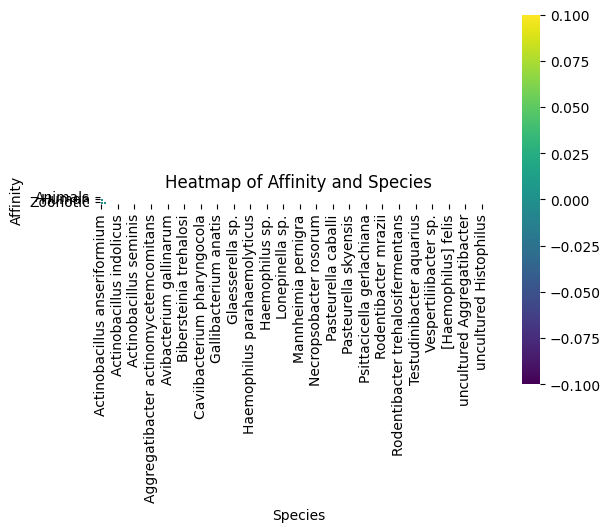

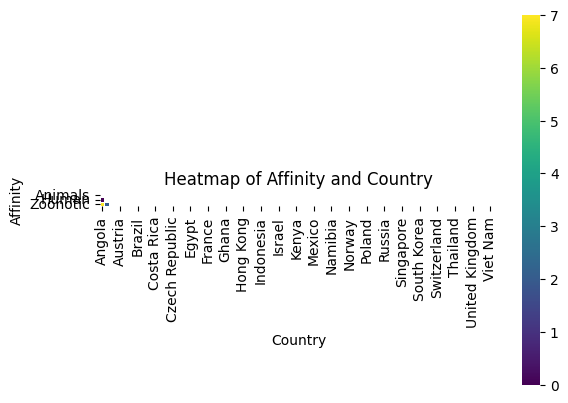

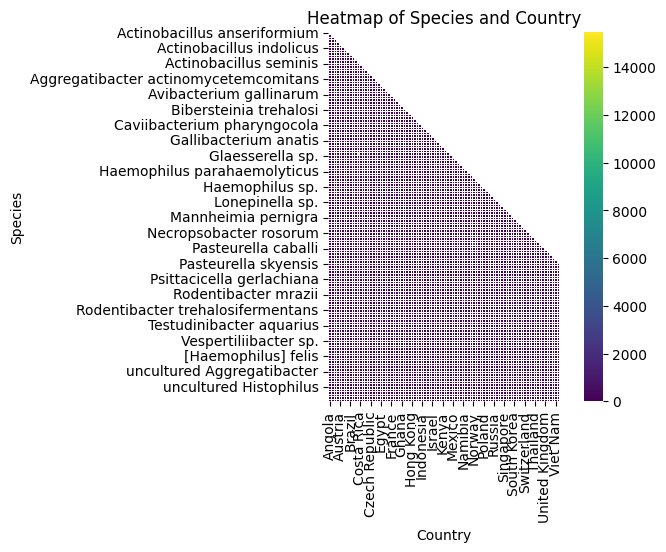

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# create a pivot table with the correct columns
pivot_table1 = pd.pivot_table(df, values='Reccord Count', index='Affinity', columns='Species', fill_value=0)
pivot_table2 = pd.pivot_table(df, values='Reccord Count', index='Affinity', columns='Country', fill_value=0)
pivot_table3 = pd.pivot_table(df, values='Reccord Count', index='Species', columns='Country', fill_value=0)

# make a mask to only show the lower triangle of the heatmaps
mask1 = np.triu(np.ones_like(pivot_table1, dtype=bool))
mask2 = np.triu(np.ones_like(pivot_table2, dtype=bool))
mask3 = np.triu(np.ones_like(pivot_table3, dtype=bool))

# plot the heatmaps
sns.heatmap(pivot_table1, mask=mask1, cmap='viridis', square=True, linewidth=.5)
plt.title('Heatmap of Affinity and Species')
plt.show()

sns.heatmap(pivot_table2, mask=mask2, cmap='viridis', square=True, linewidth=.5)
plt.title('Heatmap of Affinity and Country')
plt.show()

sns.heatmap(pivot_table3, mask=mask3, cmap='viridis', square=True, linewidth=.5)
plt.title('Heatmap of Species and Country')
plt.show()

/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


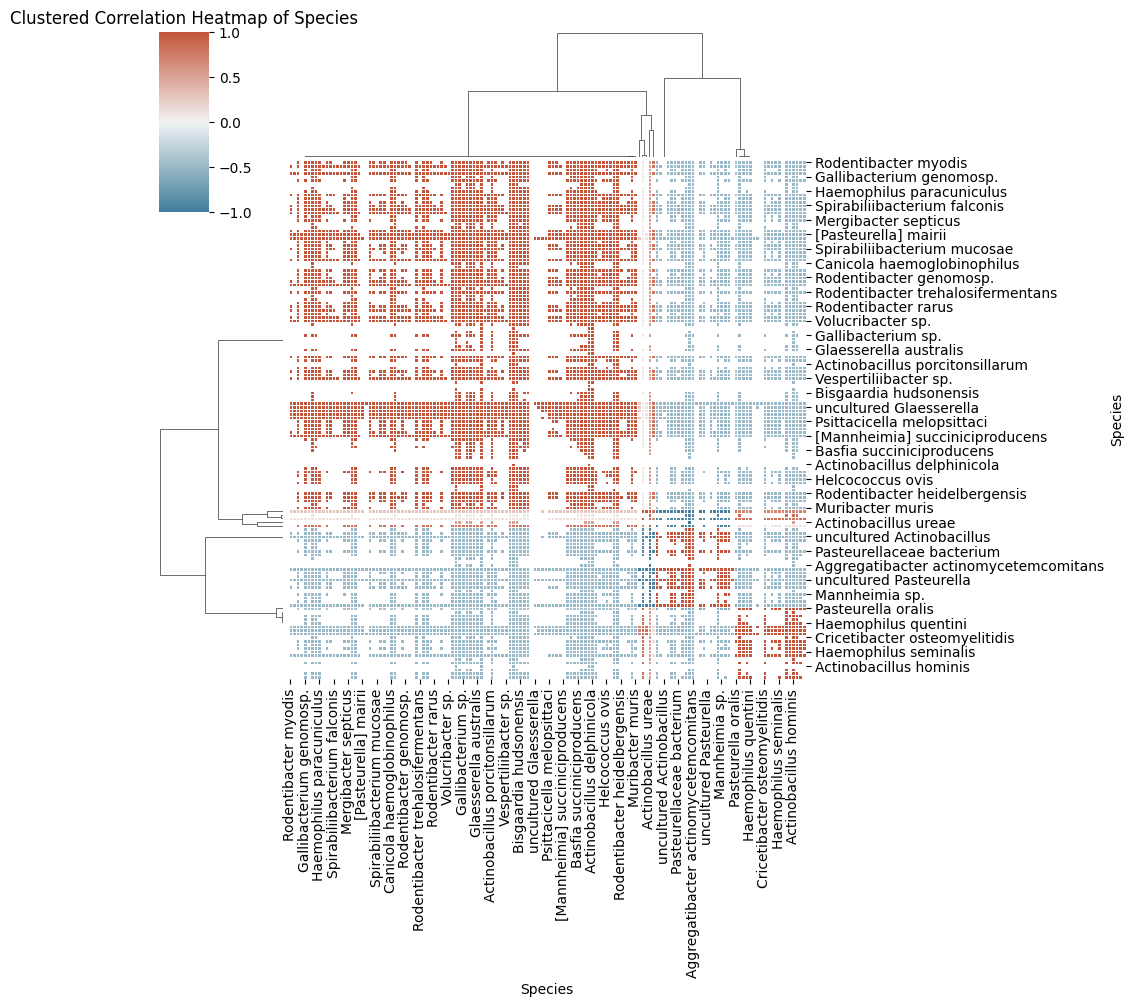

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# create a pivot table
pivot_table = pd.pivot_table(df, values='Reccord Count', index='Affinity', columns='Species', fill_value=0)

# calculate correlations
corr = pivot_table.corr()

# create a mask to only show the lower triangle of the heatmap, optional
mask = np.triu(np.ones_like(corr, dtype=bool))

# create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap
sns.clustermap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
plt.title('Clustered Correlation Heatmap of Species')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# get unique Affinity values
affinities = df['Affinity'].unique()

# for each affinity, create a correlation heatmap between species and country
for affinity in affinities:
    df_filtered = df[df['Affinity'] == affinity]
    pivot_table = pd.pivot_table(df_filtered, values='Reccord Count', index='Species', columns='Country', fill_value=0)
    
    # calculate correlations
    corr = pivot_table.corr()

    # create a mask to only show the lower triangle of the heatmap, optional
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # create a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # draw the heatmap
    sns.clustermap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title('Clustered Correlation Heatmap of Species for {} Affinity'.format(affinity))
    plt.show()

/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


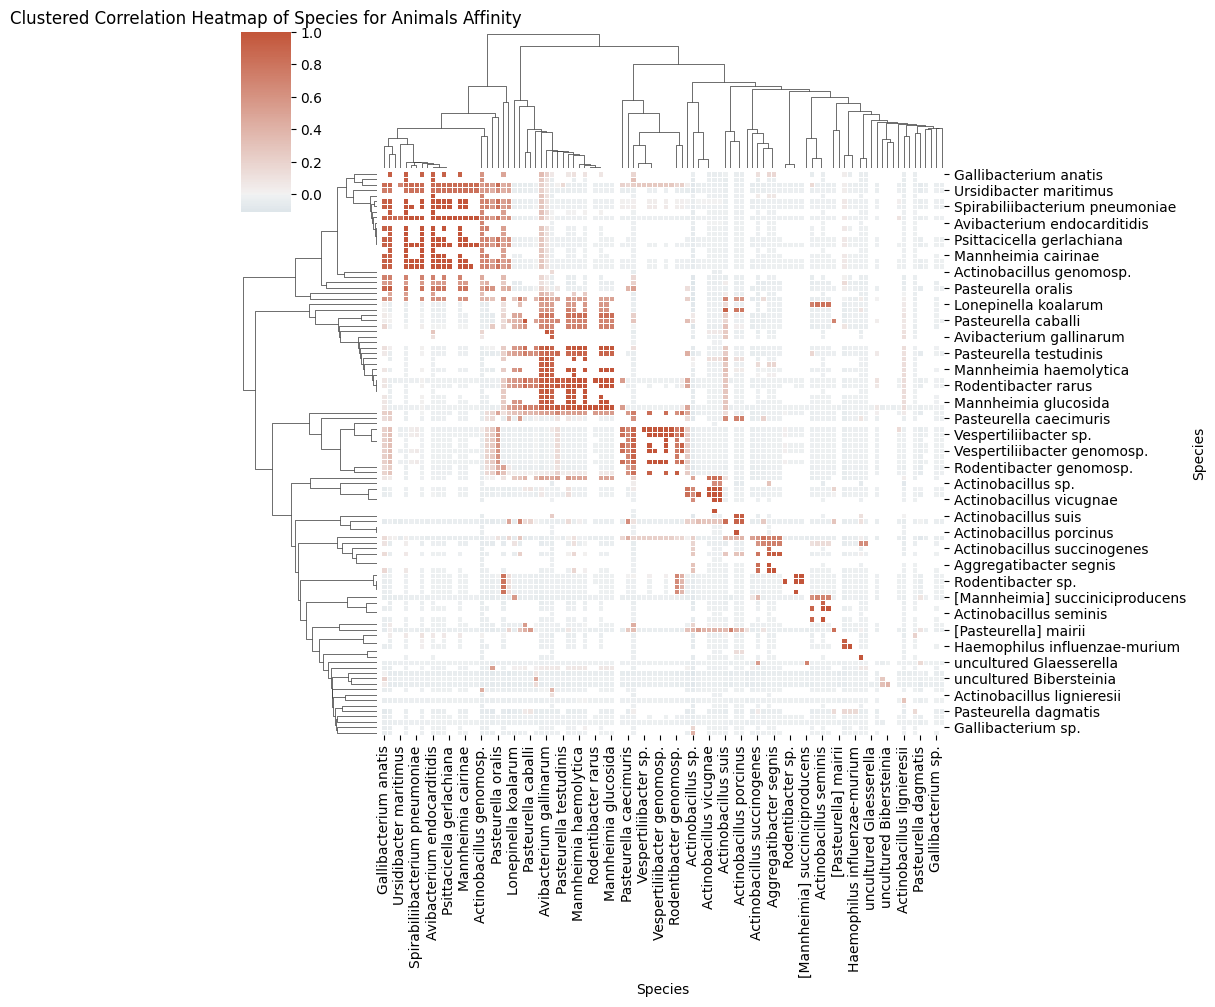

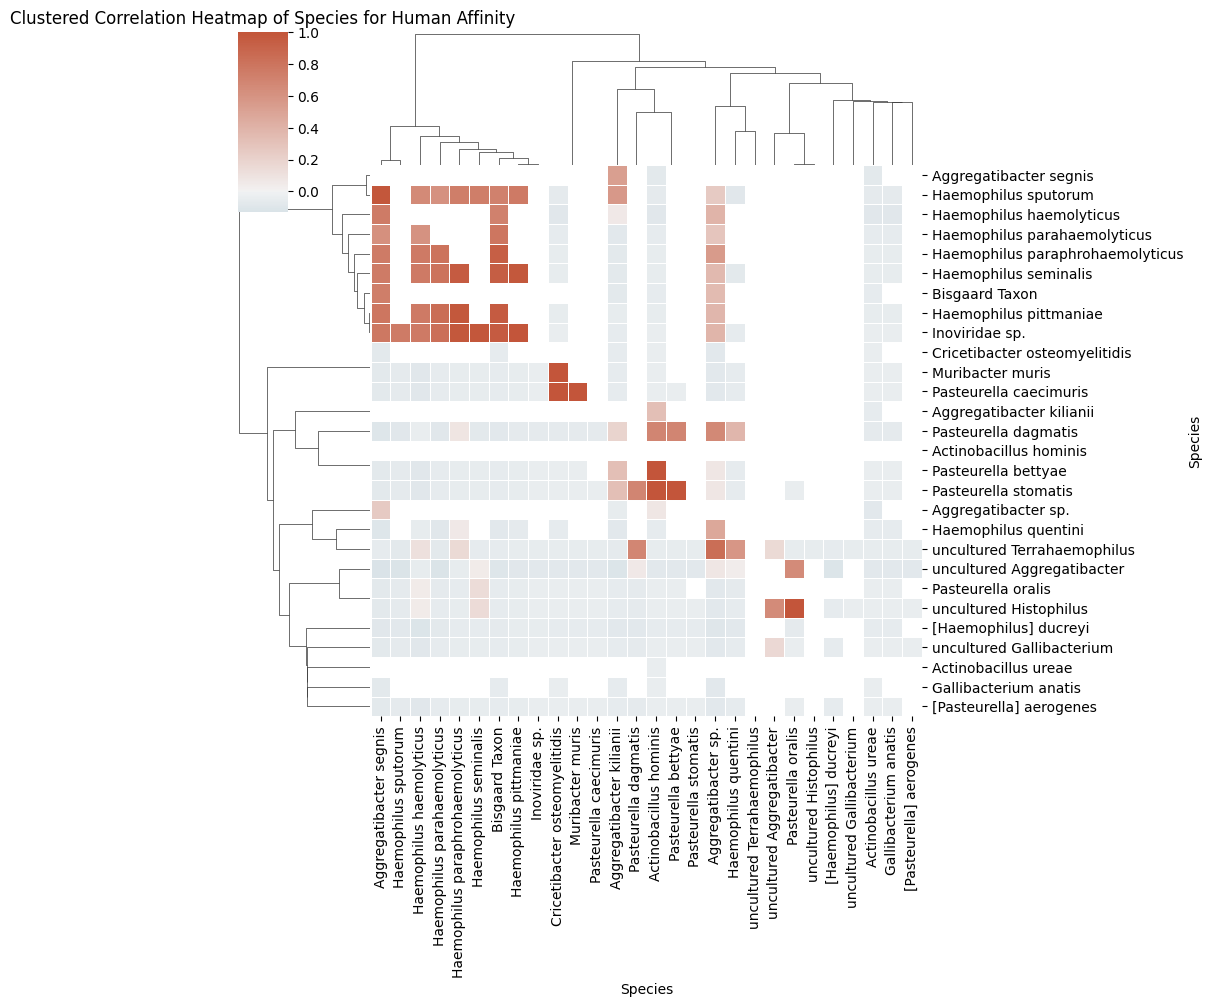

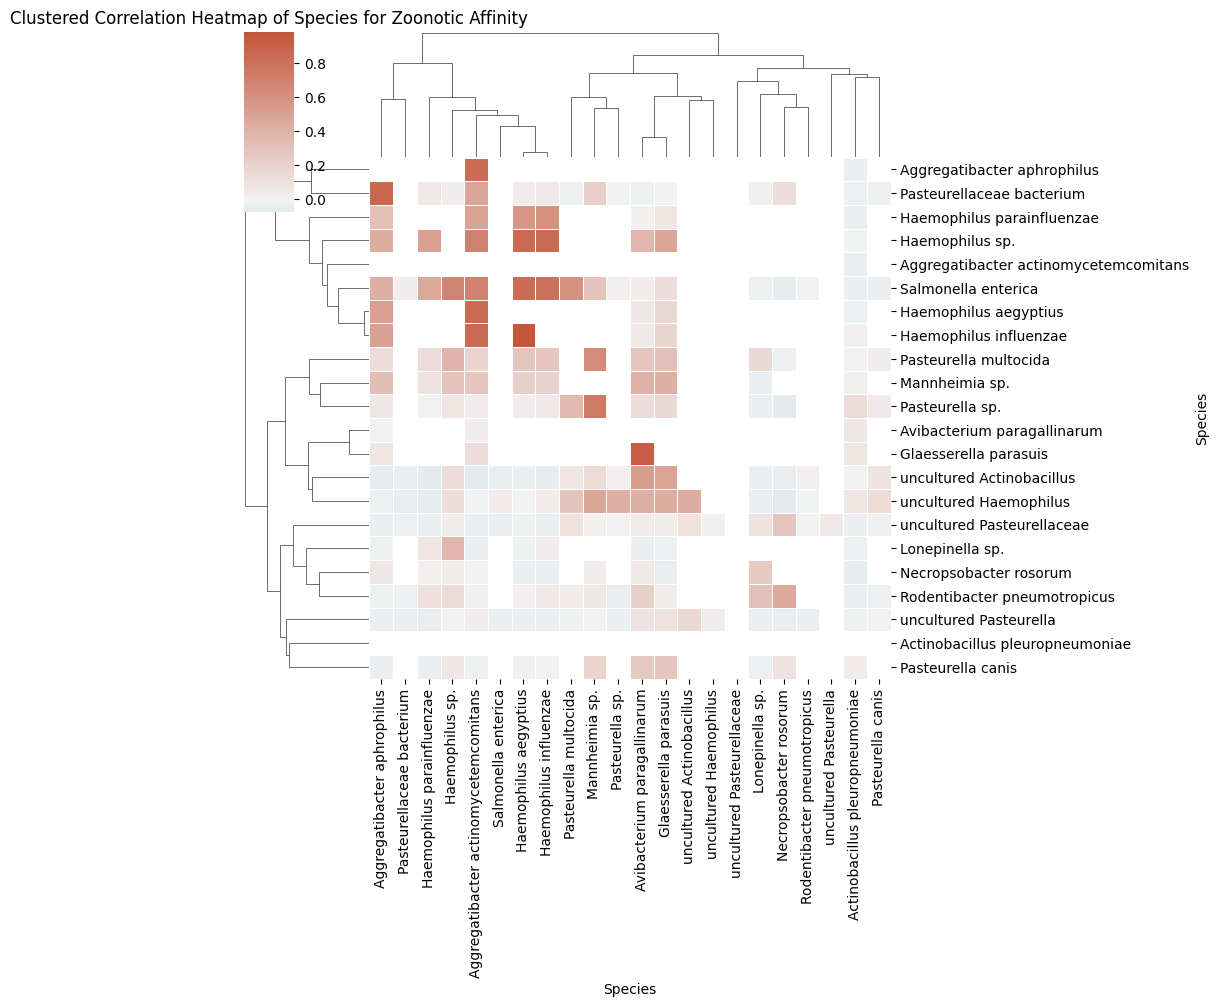

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# get unique Affinity values
affinities = df['Affinity'].unique()

# for each affinity, create a correlation heatmap between species and country
for affinity in affinities:
    df_filtered = df[df['Affinity'] == affinity]
    pivot_table = pd.pivot_table(df_filtered, values='Reccord Count', index='Country', columns='Species', fill_value=0)
    
    # calculate correlations
    corr = pivot_table.corr()

    # create a mask to only show the lower triangle of the heatmap, optional
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # create a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # draw the heatmap
    sns.clustermap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title('Clustered Correlation Heatmap of Species for {} Affinity'.format(affinity))
    plt.show()

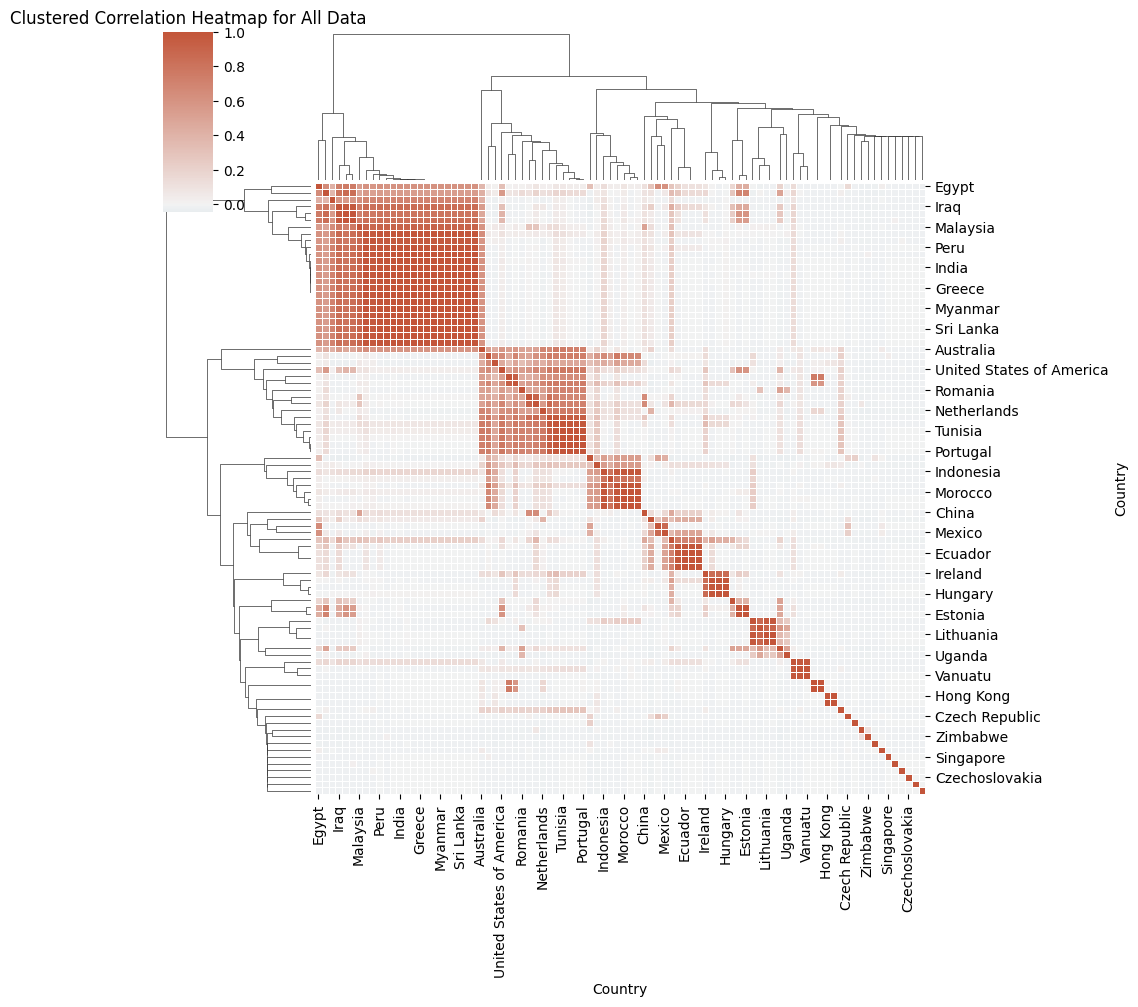

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# Create pivot table for all data
pivot_table = pd.pivot_table(df, values='Reccord Count', index='Species', columns='Country', fill_value=0)

# Compute correlation
corr = pivot_table.corr()

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the full heatmap
sns.clustermap(corr, cmap=cmap, center=0, linewidths=.5)
plt.title('Clustered Correlation Heatmap for All Data')
plt.show()

/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/younes/.pyenv/versions/3.9.18/envs/BIP16S_3.9_Bio/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


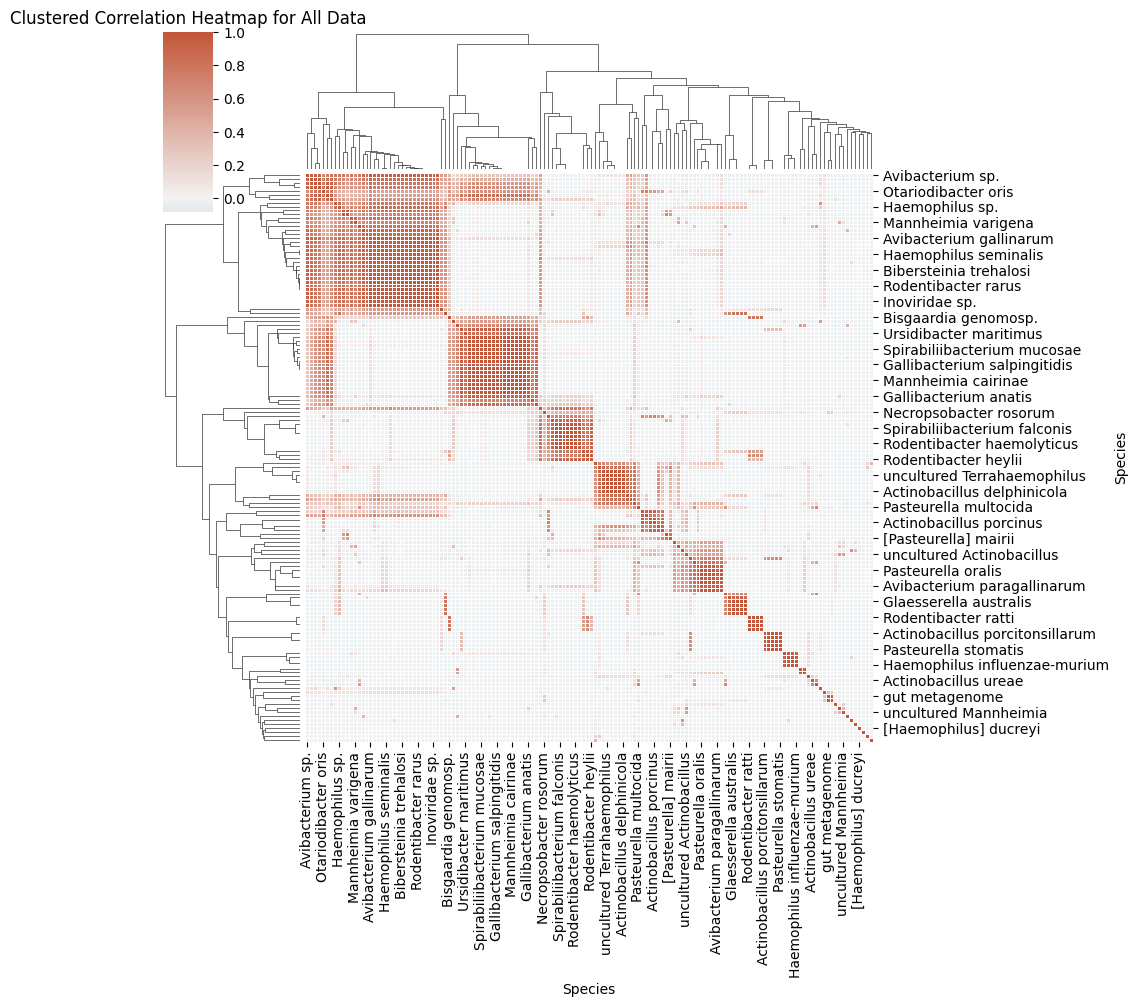

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# Create pivot table for all data
pivot_table = pd.pivot_table(df, values='Reccord Count', index='Species', columns='Country', fill_value=0)
# Create pivot table for all data
pivot_table = pd.pivot_table(df, values='Reccord Count', index='Country', columns='Species', fill_value=0)

# Compute correlation
corr = pivot_table.corr()

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the full heatmap
sns.clustermap(corr, cmap=cmap, center=0, linewidths=.5)
plt.title('Clustered Correlation Heatmap for All Data')
plt.show()

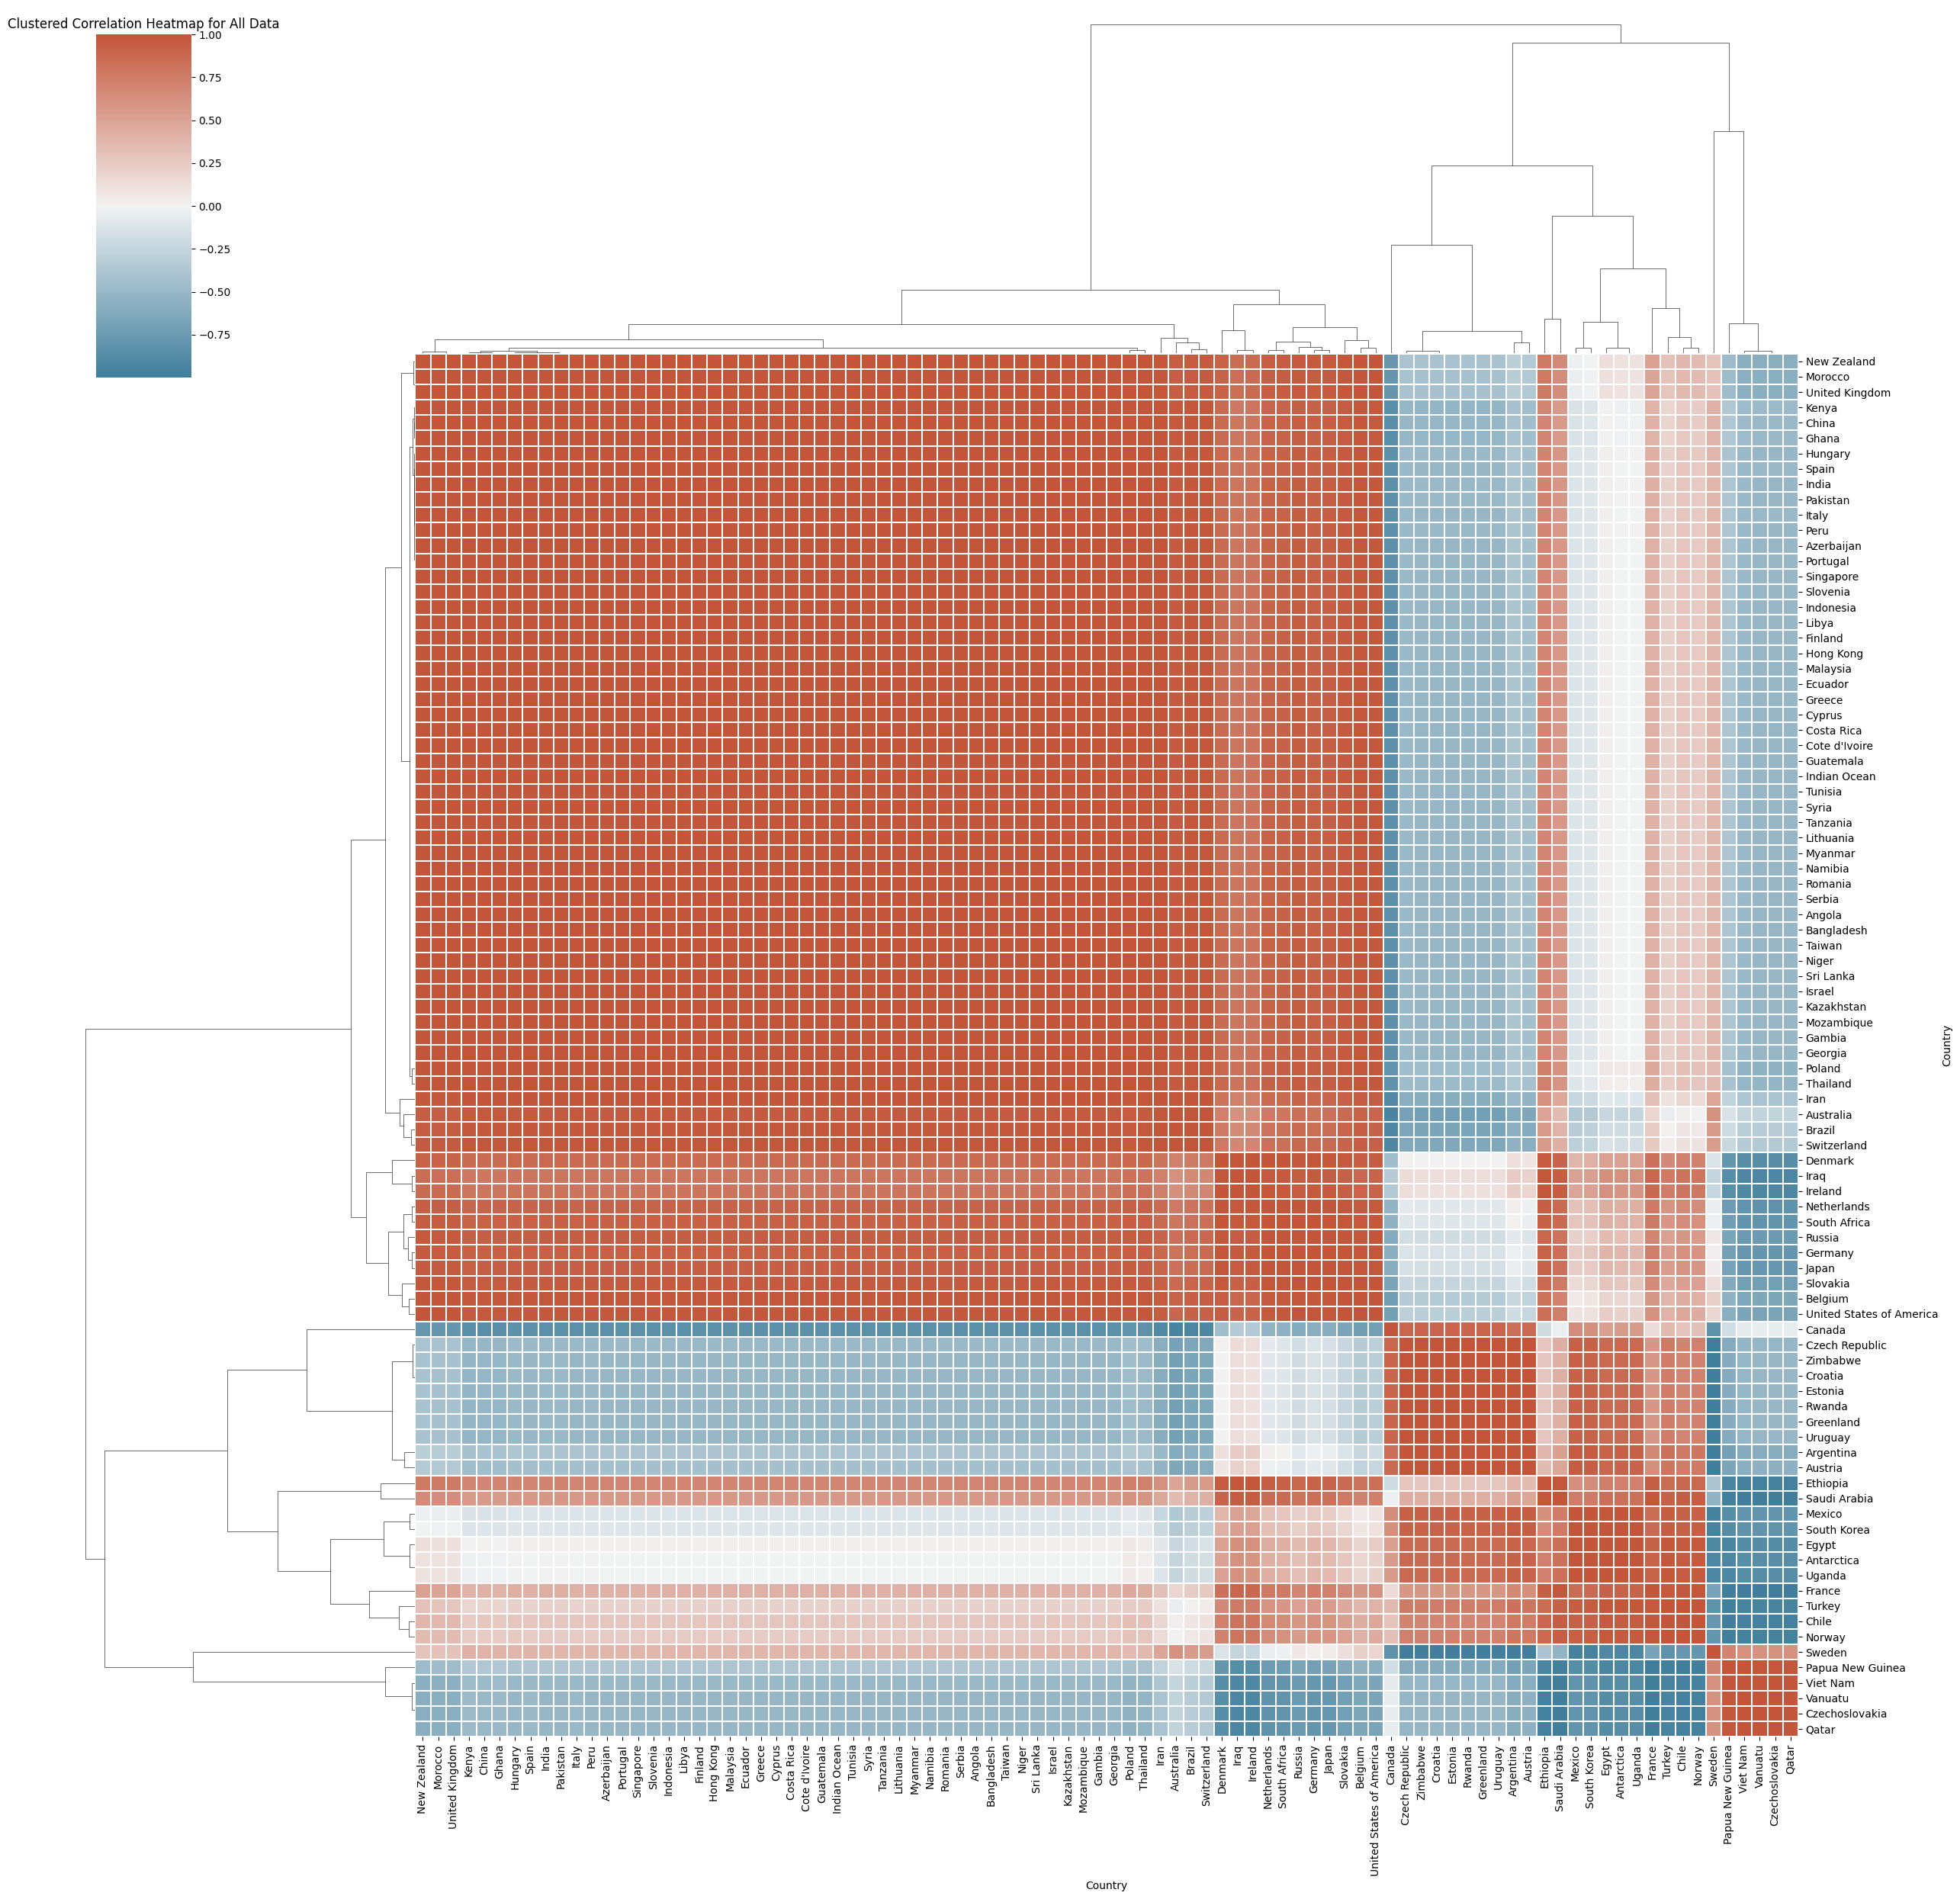

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/Users/younes/Desktop/Version_Necropsobacter_rosorum/GenGeoPlotting/Plotly/no_duplicate_Pasteurellaceae_ALL_hosts__countries_coordinates-Working_country_names_with_lat_long_output_with_affinityv2.xlsx')

# Create pivot table for all data
pivot_table = pd.pivot_table(df, values='Reccord Count', index='Affinity', columns='Country', fill_value=0)

# Compute correlation
corr = pivot_table.corr()

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the full heatmap with increased size
sns.clustermap(corr, cmap=cmap, center=0, linewidths=.10, figsize=(25, 25))

plt.title('Clustered Correlation Heatmap for All Data')
plt.show()